In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


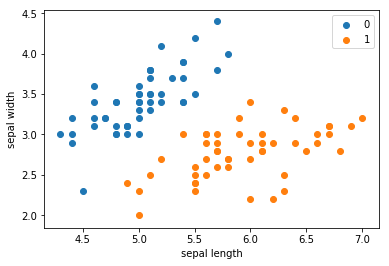

In [3]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [13]:
train_X = df.iloc[:100,0:2].values
y = df.iloc[:100,-1]
train_y = np.array([1 if i == 1 else -1 for i in y])

In [38]:
class Perceptron:
    def __init__(self):
        self.w = np.ones(2, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
        
    def train(self,X,y):
        print(self.w)
        is_wrong=True
        while is_wrong:
            wrong = 0
            for i in range(len(y)):
                y_i = y[i]
                X_i = X[i]
                if y_i*(np.dot(self.w,X_i)+ self.b) < 0:
                    self.w = self.w + self.l_rate*(np.dot(y_i,X_i))
                    self.b = self.b + self.l_rate*y_i
                    wrong += 1           
            if wrong == 0:
                break
        return "completed"
            
    def predict(self,test_X):
        if np.dot(w,test_X)+b > 0 :
            return 1
        else:
            return -1
        

In [39]:
perceptron = Perceptron()
print(len(train_y))
perceptron.train(train_X,train_y)

100
[1. 1.]


'completed'

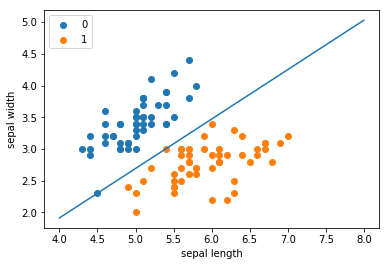

In [40]:
x_points = np.linspace(4,8,50)
y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
plt.plot(x_points, y_)

plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()